<a href="https://colab.research.google.com/github/jorgelum/EQ/blob/main/Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução ao PyTorch





**Autor:** Jorge Luiz Mendes

**Intituição:** Universidade Federal de São Paulo

## Bibliotecas

In [1]:
import pandas as pd #tratamento de dados
import numpy as np #algebra linear

import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos

import torch #rede neurais
import torch.nn as nn #rede neurais
import torch.optim as optim #rede neurais
from sklearn.model_selection import train_test_split #pré processamento

## Ajuste de Polinômio

\begin{equation}
  f(x) = cosh(x)
\end{equation}

\begin{equation}
  f(x) =  a + bx + cx^{2} + dx^{3}
\end{equation}

Definindo a arquitetura da rede.

In [2]:
class NeuralNetworking(nn.Module):

  def __init__(self):
    super().__init__()
    self.a = torch.nn.Parameter(torch.randn(()))
    self.b = torch.nn.Parameter(torch.randn(()))
    self.c = torch.nn.Parameter(torch.randn(()))
    self.d = torch.nn.Parameter(torch.randn(()))

  def forward(self,x):

    return self.a +self.b*x + self.c*x**2 +self.d*x**3

  def resultado(self):

    return f'{self.a.item()} + {self.b.item()} * x + {self.c.item()} * x^2 + {self.d.item()} * x^3'

Definindo os dados experimentais.

In [3]:
x = torch.linspace(-np.pi,np.pi, 2000)
y = torch.cosh(x)

Defindo o otimizador.

In [4]:
modelo = NeuralNetworking()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(modelo.parameters(), lr = 1e-6)

In [5]:
for t in range(3000):
    y_pred = modelo(x)
    loss = criterion(y_pred, y)
    if t % 100 == 0:
        print(f'Épocas: {t}, Perda: {loss.item()}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(modelo.resultado())

Épocas: 0, Perda: 235613.390625
Épocas: 100, Perda: 504.64447021484375
Épocas: 200, Perda: 490.61163330078125
Épocas: 300, Perda: 481.06976318359375
Épocas: 400, Perda: 474.5743103027344
Épocas: 500, Perda: 470.1477355957031
Épocas: 600, Perda: 467.1275634765625
Épocas: 700, Perda: 465.0645751953125
Épocas: 800, Perda: 463.6538391113281
Épocas: 900, Perda: 462.68798828125
Épocas: 1000, Perda: 462.0260009765625
Épocas: 1100, Perda: 461.57171630859375
Épocas: 1200, Perda: 461.2596435546875
Épocas: 1300, Perda: 461.0450134277344
Épocas: 1400, Perda: 460.8972473144531
Épocas: 1500, Perda: 460.79541015625
Épocas: 1600, Perda: 460.72509765625
Épocas: 1700, Perda: 460.67657470703125
Épocas: 1800, Perda: 460.64288330078125
Épocas: 1900, Perda: 460.6197204589844
Épocas: 2000, Perda: 460.6036376953125
Épocas: 2100, Perda: 460.5924987792969
Épocas: 2200, Perda: 460.58477783203125
Épocas: 2300, Perda: 460.5793151855469
Épocas: 2400, Perda: 460.5755920410156
Épocas: 2500, Perda: 460.572998046875
Ép

Resultados:

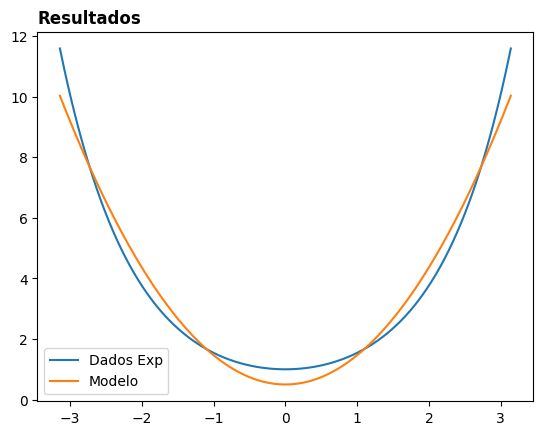

In [6]:
y_pred1 = y_pred.detach().numpy()
plt.plot(x,y,label  = "Dados Exp")
plt.plot(x,y_pred1, label = "Modelo")
plt.title('Resultados', loc = 'left',fontweight ='bold')
plt.legend(loc ='best')
plt.show()

## Prever Fases (líquido/vapor)

### Dados

Os dados foram obtidos do National Istitute of Standards and Technology (**NIST**). Deixo [aqui]('https://github.com/jorgelum/EQ/blob/main/Raspagem_eq.ipynb') um pequeno tutorial de como obter os dados com raspagem.

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/jorgelum/EQ/main/Propriedades_Heptano.csv")
df.head()

,Temperature (K),Pressure (MPa),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
0,298.15,0.1,6.7824,0.14744,-17.647,-17.632,-52.742,177.78,225.11,1132.3,-0.41073,390.13,0.12220,liquid
1,303.15,0.1,6.7398,0.14837,-16.517,-16.502,-48.983,179.56,227.02,1110.6,-0.40279,369.72,0.12069,liquid
2,308.15,0.1,6.6970,0.14932,-15.377,-15.362,-45.253,181.36,228.98,1089.0,-0.39461,350.87,0.11918,liquid
3,313.15,0.1,6.6540,0.15029,-14.227,-14.212,-41.551,183.18,230.97,1067.6,-0.38618,333.40,0.11769,liquid
4,318.15,0.1,6.6107,0.15127,-13.067,-13.052,-37.877,185.03,232.99,1046.2,-0.37748,317.19,0.11620,liquid


In [8]:
print(f'linhas: {df.shape[0]}\ncolunas: {df.shape[1]}')

linhas: 315
colunas: 14


In [9]:
df.describe()

,Temperature (K),Pressure (MPa),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (uPa*s),Therm. Cond. (W/m*K)
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,448.526889,1.020000,3.288978,7.364422,30.848586,32.701961,73.237198,231.275175,270.802032,500.205143,5.626507,111.993758,0.070696
std,87.285110,0.680493,2.881769,13.812440,31.557249,33.227299,76.155855,30.527755,34.137127,341.221137,7.308373,115.407371,0.032167
min,298.150000,0.100000,0.020287,0.147040,-17.750000,-17.632000,-53.089000,177.780000,203.410000,111.750000,-0.414780,7.207000,0.019134
25%,373.150000,0.500000,0.161200,0.163420,0.331620,0.522615,0.935125,204.235000,245.660000,189.730000,-0.262420,11.099500,0.041625
50%,448.150000,1.000000,4.805000,0.208120,29.987000,31.828000,74.125000,231.710000,269.430000,386.910000,0.497010,81.935000,0.074501
75%,523.150000,1.500000,6.119300,6.204000,60.510000,64.033000,144.605000,258.785000,290.300000,824.075000,9.958900,195.940000,0.100965
max,598.150000,2.000000,6.800800,49.293000,82.619000,87.548000,201.240000,282.240000,418.000000,1146.700000,31.757000,398.370000,0.123120


### Análise Explotatória

Distribuição de dados.

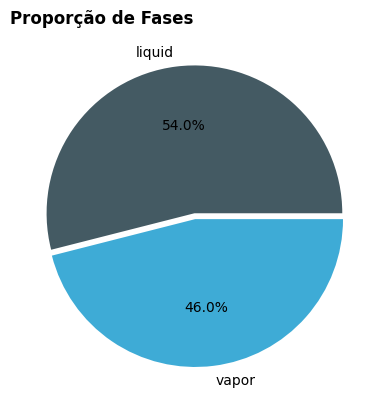

In [10]:
df.Phase.value_counts(normalize = True).plot(kind ='pie',colors =['#445a63','#3eabd6'],
                                             autopct='%1.1f%%',explode=(0.02, 0.02))
plt.title('Proporção de Fases',loc ='left',fontweight = 'bold')
plt.ylabel('')
plt.show()

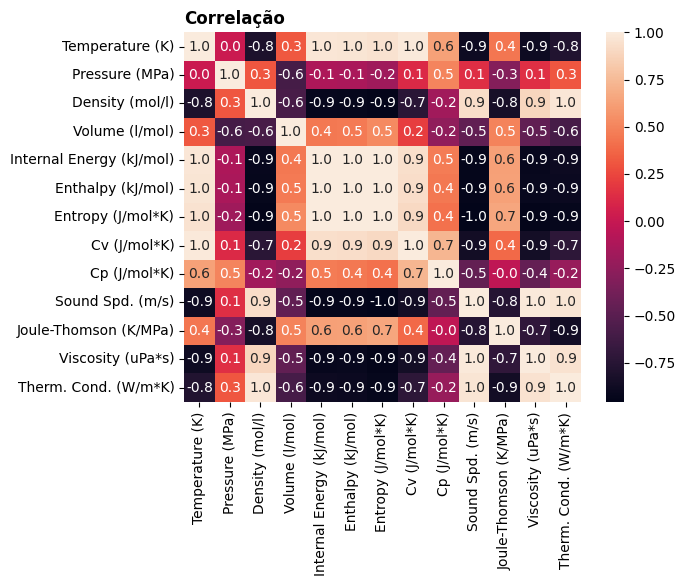

In [11]:
mapa_calor = df.drop('Phase', axis=1).corr(method = 'pearson')

sns.heatmap(mapa_calor,annot=True, fmt=".1f" )
plt.title('Correlação',loc = 'left',fontweight ='bold')
plt.show()

Comportamento de algumas propriedades em função da temperatura.

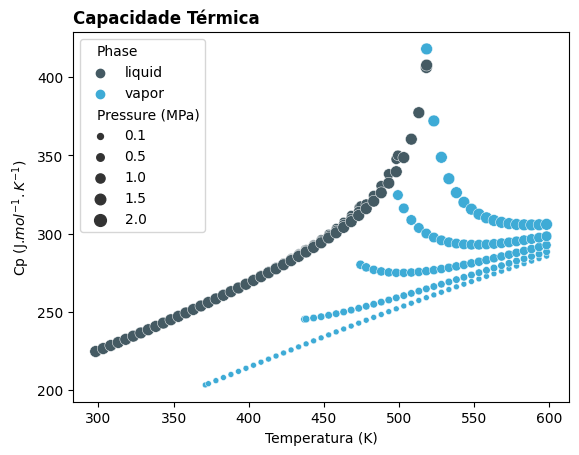

In [12]:
sns.scatterplot(data=df, x ='Temperature (K)', y ='Cp (J/mol*K)',
                hue ='Phase',size ='Pressure (MPa)', palette =['#445a63','#3eabd6'])
plt.title('Capacidade Térmica',loc ='left',fontweight = 'bold')
plt.xlabel('Temperatura (K)')
plt.ylabel(r'Cp (J.$mol^{-1}.K^{-1}$)')
plt.show()

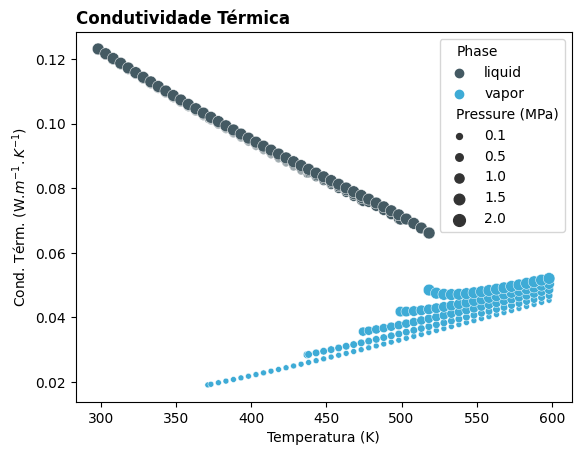

In [13]:
sns.scatterplot(data=df, x ='Temperature (K)', y ='Therm. Cond. (W/m*K)',
                hue ='Phase',size ='Pressure (MPa)', palette =['#445a63','#3eabd6'])
plt.title('Condutividade Térmica',loc ='left',fontweight = 'bold')
plt.xlabel('Temperatura (K)')
plt.ylabel(r'Cond. Térm. (W.$m^{-1}.K^{-1}$)')
plt.show()

### Criando o modelo

Defindo as variáveis de entrada e modelo com base na baixa correlação entre elas. Os dados foram separados, de forma aleatória, para o treino (70%) e teste (30%).

In [14]:
dict_Phase = {'liquid':0,'vapor':1} # Transformando os dados categóricos em binários
df['Phase_B'] = df.Phase.map(dict_Phase)
features = ['Temperature (K)',	'Pressure (MPa)',	'Density (mol/l)','Viscosity (uPa*s)']
target = 'Phase_B'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state= 50)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [15]:
# Definir a arquitetura da rede neural
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 8)  # Camada de entrada da rede neural com 4 entradas e 8 saídas
        self.fc2 = nn.Linear(8, 8) # Camada de oculta da rede neural com 8 entradas e 8 saídas
        self.fc3 = nn.Linear(8, 1) # Camada de entrada da rede neural 8 entradas e 1 saída

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [16]:
model = NeuralNetwork()

# Definir a função de perda e o otimizador
criterion = nn.BCELoss()  # Função de perda para classificação binária
optimizer = optim.SGD(model.parameters(), lr=1e-6)  # Otimizador SGD com learning rate de 10^-6

# Treinamento da rede
num_epochs = 2000
for epoch in range(num_epochs):

    outputs = model(X_train_tensor)
    outputs = torch.squeeze(outputs)
    loss = criterion(outputs, y_train_tensor)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch + 1}/{num_epochs}], Perda: {loss.item():.4f}')

# Avaliação
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    test_outputs = torch.squeeze(test_outputs)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Perda nos dados de teste: {test_loss.item():.4f}')

Época [100/2000], Perda: 0.6769
Época [200/2000], Perda: 0.6474
Época [300/2000], Perda: 0.6223
Época [400/2000], Perda: 0.6007
Época [500/2000], Perda: 0.5820
Época [600/2000], Perda: 0.5654
Época [700/2000], Perda: 0.5505
Época [800/2000], Perda: 0.5369
Época [900/2000], Perda: 0.5242
Época [1000/2000], Perda: 0.5125
Época [1100/2000], Perda: 0.5013
Época [1200/2000], Perda: 0.4906
Época [1300/2000], Perda: 0.4804
Época [1400/2000], Perda: 0.4705
Época [1500/2000], Perda: 0.4609
Época [1600/2000], Perda: 0.4515
Época [1700/2000], Perda: 0.4424
Época [1800/2000], Perda: 0.4341
Época [1900/2000], Perda: 0.4272
Época [2000/2000], Perda: 0.4215
Perda nos dados de teste: 0.3801


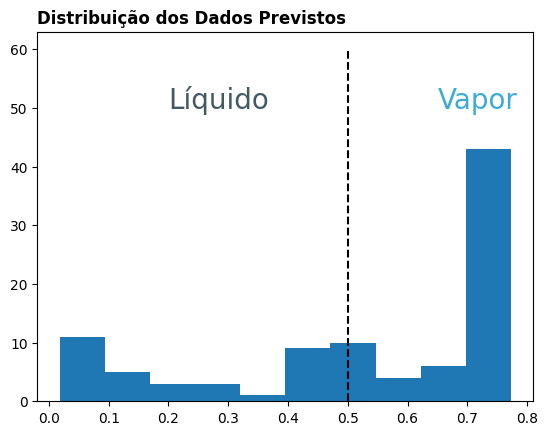

In [17]:
plt.hist(x = test_outputs, bins = 10)
plt.vlines(ymin=0,ymax=60,x = 0.5, linestyles = '--',color = 'black')
plt.annotate(text = "Líquido", xy = (0.2,50),color = "#445a63",size= 20)
plt.annotate(text = "Vapor", xy = (0.65,50),color = "#3eabd6",size= 20)
plt.title("Distribuição dos Dados Previstos",loc = 'left',fontweight = 'bold')
plt.show()

In [18]:
df1 = pd.DataFrame(data ={'Modelo':test_outputs,'Experimental':y_test_tensor})
df1['Modelo'] = df1.Modelo.map(lambda x: 1 if x >= 0.5 else 0)
df1.head()

,Modelo,Experimental
0,0,0.0
1,0,0.0
2,0,0.0
3,1,1.0
4,1,1.0


In [19]:
ac = round(np.mean(df1['Experimental'] == df1['Modelo'])*100,2)
print(f'Acurácia do Modelo: {ac} %')

Acurácia do Modelo: 86.32 %
